# Introductory applied machine learning (INFR10069)

<div align="right"><font color="blue" size="5">Your Score was 116.5 out of a total of 151.0, or 77.2%</font></div>

# Assignment 2: Linear regression

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. There are some questions which are **specific to those taking the Level-11 version** of the course (INFR11182 and INFR11152). These are clearly marked with the words **(LEVEL 11)** and must be completed by those taking the Level 11 course. Those on the Level 10 version (INFR10069) may (and are advised to) attempt such questions but this will not affect their mark in any way, nor will they get feedback on them.

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. Keep your answers brief and concise. Most written questions can be answered with 2-3 lines of explanation.

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).

### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 18/10/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

All submissions happen electronically. To submit:

1. Fill out this notebook, and save it, making sure to **KEEP the name of the file UNCHANGED**.

1. On a DICE environment, open the terminal, navigate to the location of this notebook, and submit this notebook file using the following command:

  ```submit iaml cw1 "02_LinearRegression.ipynb"```

  What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You can check the status of your submissions with the `show_submissions` command.
  
1. **Distance Learners:** To copy your work onto DICE (so that you can use the `submit` command) you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example (replace entries in `[square brackets]` with your specific details):
```
filename="02_LinearRegression.ipynb"
local_scp_filepath=[DIRECTORY CONTAINING GIT REPOSITORY]${filename}
server_address=student.ssh.inf.ed.ac.uk
scp -r ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
# rsync -rl ${local_scp_filepath} [YOUR USERNAME]@${server_address}:${filename}
ssh [YOUR USERNAME]@${server_address}
ssh student.login
submit iaml cw1 "02_LinearRegression.ipynb"
```

**N.B.: This is still Coursework 1 (cw1)**

### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignment.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn import preprocessing


/afs/inf.ed.ac.uk/user/s14/s1459898/miniconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: 

1. The specification of an automobile in terms of various characteristics 

1. Assigned insurance risk rating 
   * this rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

1. Normalized losses in use as compared to other cars
  * the third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year (avg_loss/car/year). 


To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.


## 1. Data Visualisation

Before jumping into our problem, it is beneficial to get a feel for the data we are dealing with in the rest of the assignment.

<a id='question_1_1'></a>
### ========== Question 1.1 --- [8 marks] ==========

Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Using any suitable pandas functionality, 
1. [Code] summarise *and*
1. [Text] comment upon

the key features of the data. Show all your code!

<div align="right"><font color="blue" size="4">5.0/8.0</font></div>

In [2]:
# (1) # Your Code goes here:
# Load in the data:
data_path = os.path.join(os.getcwd(),'datasets','train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path,delimiter=',')

# Do some data exploration:
print("The number of data in the dataset: {}".format(auto_numeric.shape[0]))
print("The number of features in the dataset: {}".format(auto_numeric.shape[1]))
display(auto_numeric.head(),auto_numeric.describe())

The number of data in the dataset: 159
The number of features in the dataset: 16


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.4,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.4,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.8,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.5,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.8,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0


,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***

From the data exploration, we know that there is no missing value in the dataset. Besides, we notice that the range and scale of standard deviation of each features are very heterogeneous, ranging from 0.297 (`bore`) to 34123.71 (`engine-power`). And notice that, the standard deviation of `engine-size` and `torque` not very large, but the range of their values  are quite huge, 170.77(=174.160-3.390 ) and 3932.27(=3912.870--19.400) respectively. This might indicate there is possibility that exist extreme values in `engine-size` and `torque`. 

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Given that these are all measures of completely different things, mostly in different units, it doesn't seem useful to know that they are 'very heterogeneous'
Missing:
Dimensions of dataset
Data-type</font></div>

### ========== Question 1.2 --- [18 marks] ==========

We will now examine the attributes in some detail. Familiarise yourself with the concept of Correlation Coefficients (start from the Lecture on Generalisation and Evaluation).

1. [Code] Analyse first the relationship between each attribute and price:
  1. Compute the correlation coefficient between each attribute and price, *and*
  1. Visualise the distribution of each attribute with price
1. [Text] Given the above, which attributes do you feel may be most useful in predicting the price? (mention at least 5). How did you reach this conclusion? *Hint: which is the more useful of the above tools?*
1. [Code] Now we will analyse the relationship between the attributes themselves. Use an appropriate pairwise visualisation tool to display graphically the relationship between each pair of attributes you selected in (2).
1. [Text] Do any attributes exhibit significant correlations between one-another? (restrict your analysis to useful attributes identified above)
1. [Text] Which attributes (give examples) would you consider removing if we wish to reduce the dimensionality of the problem and why?

<div align="right"><font color="blue" size="4">13.5/18.0</font></div>

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
normalized-losses,1.000000,0.265839,0.107466,0.116585,-0.020609,0.079557,0.034299,0.189555,-0.001313,0.186282,0.335041,0.141409,0.200628,-0.085740,0.022708,0.015368
wheel-base,0.265839,1.000000,0.681389,0.600716,0.442202,0.280880,0.470710,0.352131,0.176007,0.333710,0.085586,-0.064238,-0.073370,-0.003438,0.009543,0.423511
length,0.107466,0.681389,1.000000,0.569162,0.421044,0.373823,0.557375,0.203306,0.155039,0.454824,0.071852,-0.139376,-0.126187,-0.040386,0.095914,0.512883
width,0.116585,0.600716,0.569162,1.000000,0.325955,0.355554,0.508095,0.271511,0.189502,0.501970,0.042182,0.041894,-0.005983,-0.031611,0.126870,0.524326
height,-0.020609,0.442202,0.421044,0.325955,1.000000,-0.027083,0.278442,0.108715,0.180177,0.183170,0.066918,0.132568,0.219125,0.037002,-0.097849,0.139563
engine-size,0.079557,0.280880,0.373823,0.355554,-0.027083,1.000000,0.244426,0.229055,0.000177,0.406256,-0.110554,-0.332712,-0.339345,-0.033339,0.051169,0.715125
bore,0.034299,0.470710,0.557375,0.508095,0.278442,0.244426,1.000000,0.120259,0.068066,0.412512,-0.013364,-0.039924,-0.152872,-0.023951,0.171951,0.365207
stroke,0.189555,0.352131,0.203306,0.271511,0.108715,0.229055,0.120259,1.000000,0.092403,0.166851,0.260301,0.174627,0.134499,0.015572,-0.110367,0.127834
compression-ratio,-0.001313,0.176007,0.155039,0.189502,0.180177,0.000177,0.068066,0.092403,1.000000,0.070554,-0.136092,0.198281,0.250368,0.110423,-0.044767,0.125683
engine-power,0.186282,0.333710,0.454824,0.501970,0.183170,0.406256,0.412512,0.166851,0.070554,1.000000,0.204196,-0.133348,-0.228453,0.025281,0.008146,0.443969


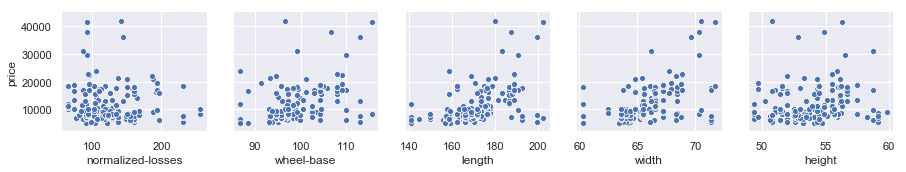

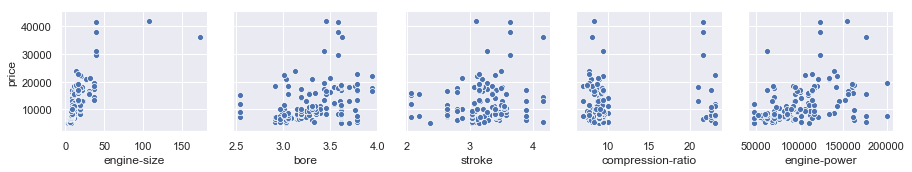

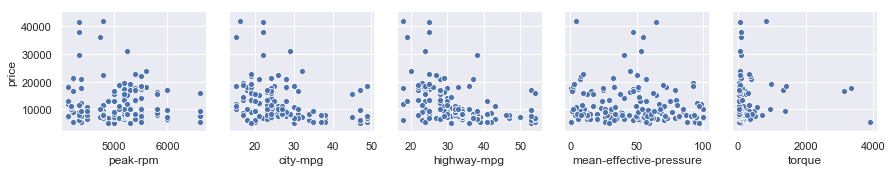

In [3]:
# (1) # Your Code goes here:
# (Part A) The correlation coefficient between each attribute and price:
corr = auto_numeric.corr()
display(corr)

# (Part B) The distribution of each attribute with price:
sns.pairplot(auto_numeric,x_vars=auto_numeric.columns[:5],y_vars="price")
sns.pairplot(auto_numeric,x_vars=auto_numeric.columns[5:10],y_vars="price")
sns.pairplot(auto_numeric,x_vars=auto_numeric.columns[10:-1],y_vars="price")
plt.tight_layout()
plt.show()


<div align="right"><font color="blue" size="4">4.5</font></div>

<div align="left"><font color="green" size="4">You weren't asked for CCs for all pairings, just price x [others]. Also, a 16 X 16 table is not a good data visualisation. It would be much more helpful show the CC's of the attributes with price as a list, in CC value order.</font></div>

(2) ***Your answer goes here:***

From the graph shows above, the attributes that I feel may be most useful in predicting the price are:`engine-size`, `width`, `length`, `engine-power`, `wheel-base`,`bore`, `highway-mpg` and `city-mpg`. Looking at the correlation matrix between all attributes and price, those are the attributes that have the higher correlation with `price`, correlate most with price:

  * Cov(`engine-size`, `price`) = 0.72
  * Cov(`width`, `price`) = 0.52
  * Cov(`length`, `price`) = 0.51
  * Cov(`engine-power`, `price`) = 0.44
  * Cov(`wheel-base`, `price`) = 0.42
  * Cov(`bore`, `price`) = 0.37
  * Cov(`highway-mpg`, `price`) = -0.44
  * Cov(`city-mpg`, `price`) = -0.36

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Missing:
Why use the CC's, rather than your pairwise visualisations? Explain.
Bonus: +1 for observing that positive and negative correlations are equally useful.</font></div>

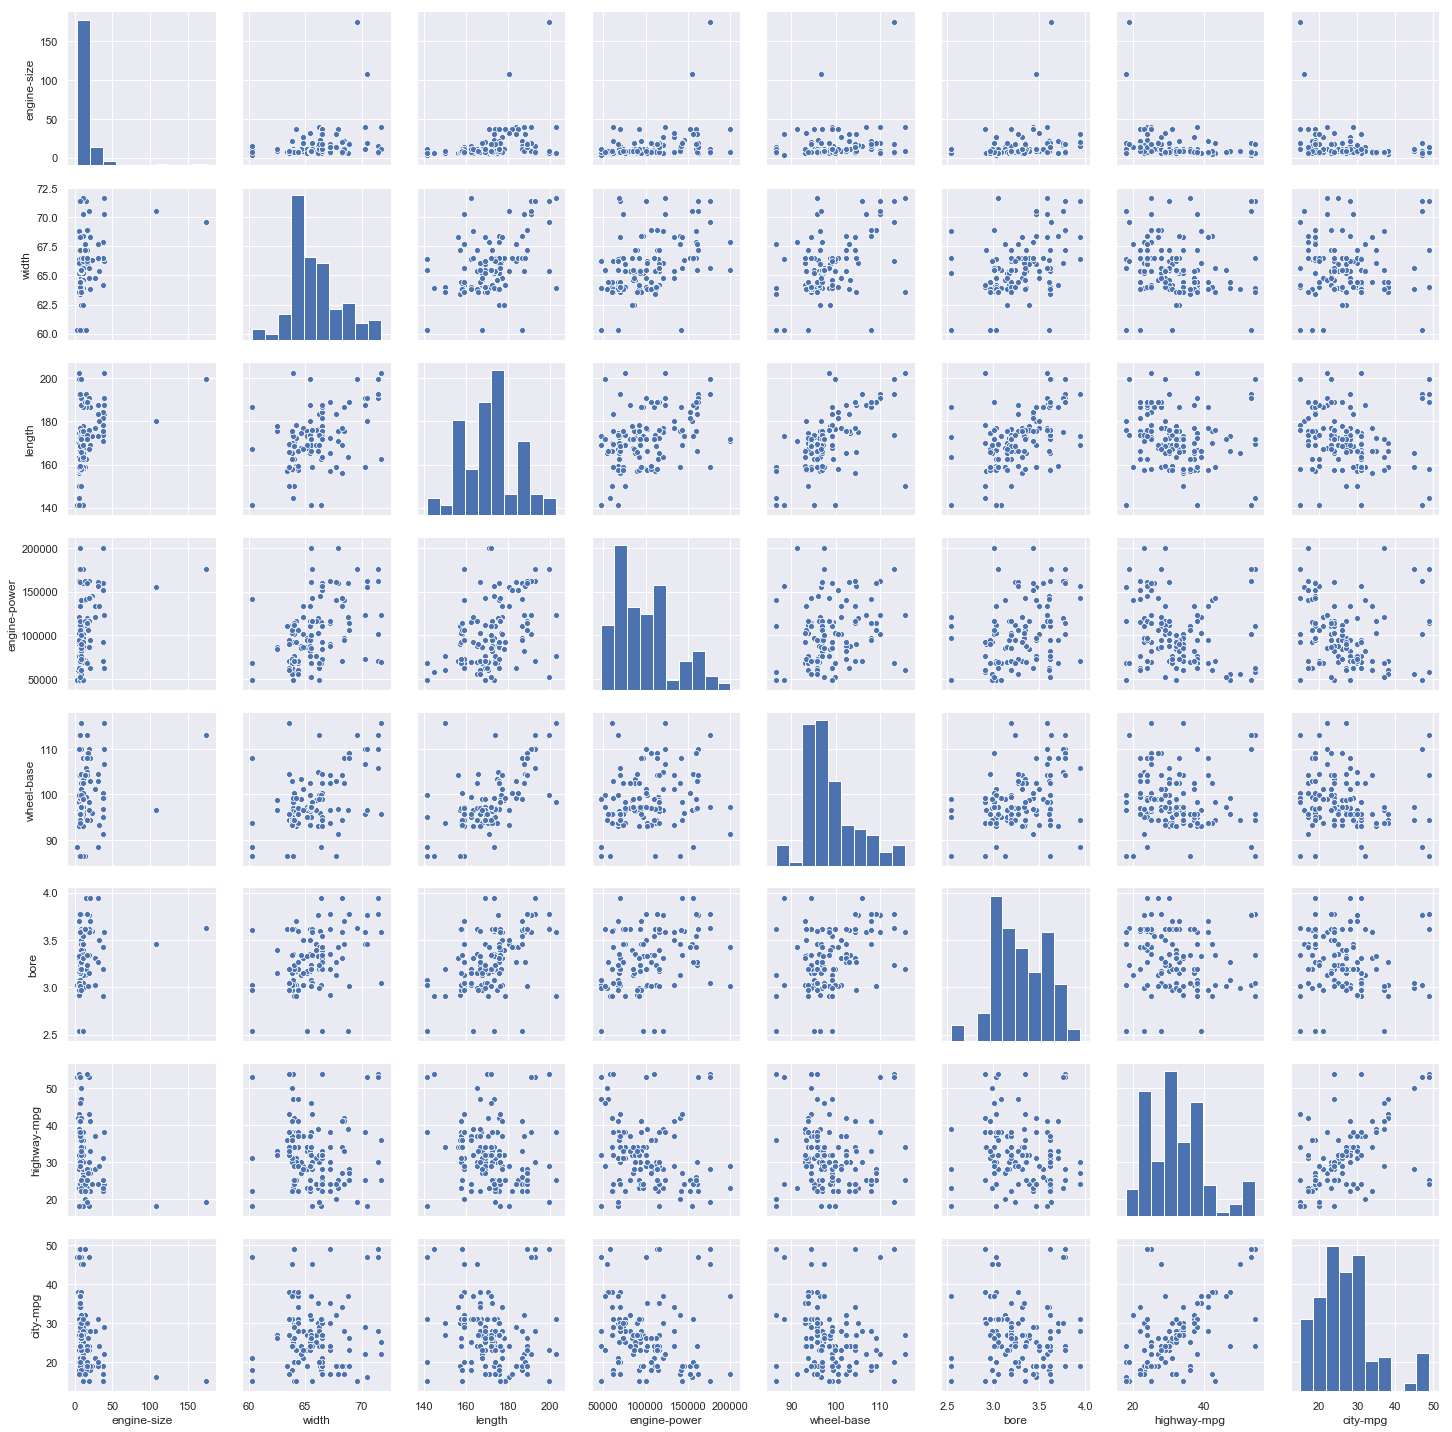

In [4]:
# (3) # Your Code goes here:
# Plot pairwise relationship between each pair of selected attributes:
sns.pairplot(auto_numeric,vars=['engine-size','width','length','engine-power','wheel-base','bore','highway-mpg','city-mpg'])
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(4) ***Your answer goes here:***

From the plot of pairwise relationship between each pair of selected attributes and confusion matrix, those listed below are the attributes that I think might exhibit significant correlations between one-another:
  * `width` and `length` (0.57)
  * `width` and `wheel-base` (0.60)
  * `width` and `engine-power` (0.50)
  * `width` and `bore` (0.51)
  * `length` and `engine-power` (0.45)
  * `length` and `wheel base` (0.68)
  * `length` and `bore` (0.56)
  * `wheel-base` and `bore` (0.47)
  * `highway-mpg` and `city-mpg` (0.64)

<div align="right"><font color="blue" size="4">2.0</font></div>

(5) ***Your answer goes here:***

Attributes that I would consider removing if I wish to reduce the dimensionality of the problem are `width` (or `length`). This is because there is chance that because of the way that atrribute `width` is highly correlated with attributes `length`, leading to a correlation with `price`, causing attribute `width` stands out in the scatterplot and correlation matrices. Besides, since both the features are correlated, then there is possibility that adding one of them does not add any additional information. One of them may be actually removed in the subsequent analysis. 

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">Note that an attribute can also be useless simply because of a low absolute correlation coefficient with price.</font></div>

## 2. Simple Linear Regression

When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. We will thus begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable, which we take to be the `engine-power`.

### ========== Question 2.1 --- [5 marks] ==========

1. [Code] Produce a scatter plot of `price` against `engine-power` (label the axis). 
1. [Text] What are your thoughts about the ability of the variable to predict the price?

<div align="right"><font color="blue" size="4">4.0/5.0</font></div>

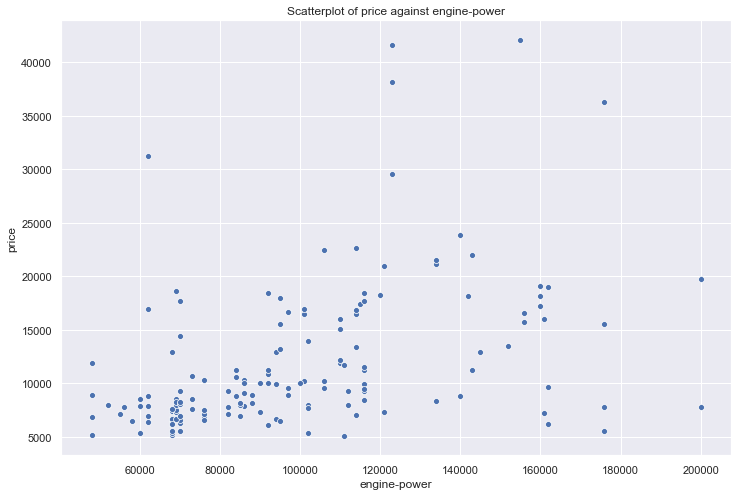

In [5]:
# (1) # Your Code goes here:
# scatter plot of price against engine-power: 
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x=auto_numeric['engine-power'],y=auto_numeric['price'])
plt.title('Scatterplot of price against engine-power')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

The scatterplot seems to show an slight uphill pattern as we move from left to right, this might indicate a weak positive relationship between `engine-power` and `price`, which means as the value of `engine-power` increases, the `price` increases as well.

<div align="right"><font color="blue" size="4">2.0</font></div>

<div align="left"><font color="green" size="4">It's also worth noting that the relationship between the variables is somewhat dubiously linear.</font></div>

### ========== Question 2.2 --- [8 marks] ==========

1. [Code] Now visualise the distribution of the car price (again label the axes). Choose a sensible value for the number of bins in the histogram.
1. [Text] Comment on why the price variable *may not* be easy to model using linear regression, and suggest possible preprocessing to improve its applicability. At the same time, explain why it is not conclusive that it is the case at this stage. 
*N.B. There is no need to carry out the preprocessing at this stage, just comments*

<div align="right"><font color="blue" size="4">8.0/8.0</font></div>

/afs/inf.ed.ac.uk/user/s14/s1459898/miniconda3/envs/py3iaml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


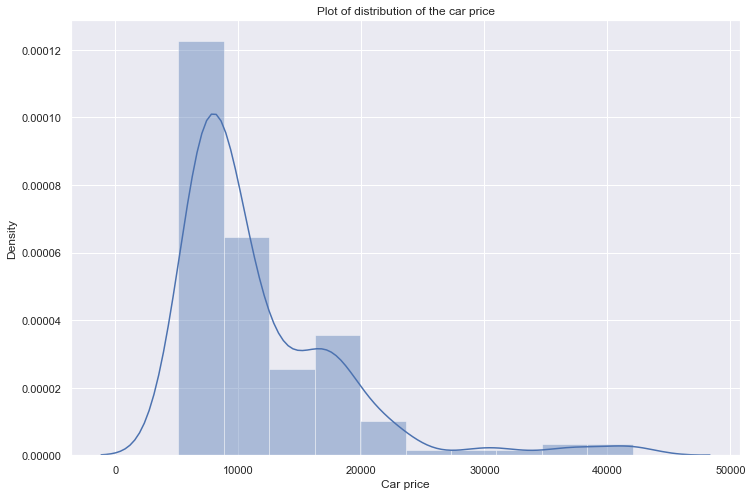

In [6]:
# (1) # Your Code goes here:
# Plot of distribution of the car price
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.distplot(auto_numeric['price'],bins=10)
plt.ylabel('Density')
plt.xlabel('Car price')
plt.title('Plot of distribution of the car price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

The `price` variable may not be easy to model using linear regression because the target variable is highly skewed to the right. There are some systemic extreme values, causing skewed distribution, which will affect the ordinary least squares linear regression model. Ordinary least squares linear regression models the mean but the mean is not a good measure of central tendency in a skewed distribution. We can do the log or sqaure root transformation. 

However, it is not conclusive that it is the case at this stage as the normality assumption is more accurate to check on whether the errors of the linear regression model are normally distributed since the normality assumption for ordinary least squares linear regression are based on the errors, not the target variable.

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Perfect</font></div>

### ========== Question 2.3 --- [3 marks] ==========
We want to prepare our dataset for training/testing. Extract the dependent variable into a vector and the independent attribute into another. Split the dataset with 80% for training and the remaining 20% for testing, naming the resulting arrays `X_train`, `X_test`, `y_train` and `y_test`.

*Hint: you may use Scikit's `train_test_split`: set the random state to 0 for reproducibility*.

**N.B. For technical reasons, `X_train`/`X_test` must be 2D arrays: extend the dimensions of the independent attribute before splitting the dataset, such that the shape of the resulting array is (n,1) where n is the number of instances in the dataset**.

<div align="right"><font color="blue" size="4">3.0/3.0</font></div>

In [7]:
# Your Code goes here:
# Split the data into 80% for training set and the remaining 20% for test set:
x = auto_numeric['engine-power'][:,np.newaxis]
y = auto_numeric['price'][:,np.newaxis]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2, random_state=0)

<div align="right"><font color="blue" size="4">3.0</font></div>

### ========== Question 2.4 --- [4 marks] ==========

Decide on a simple **baseline** to predict the `price` variable. Implement it and display its parameter.

*Hint: This should be just 1 line of code + a print/display*

<div align="right"><font color="blue" size="4">1.0/4.0</font></div>

In [8]:
# Your Code goes here:
# Median is used as a simple baseline to predict the price variable
baseline = np.median(auto_numeric['price'])
print("Baseline prediction is the median value of outcome variable, price: {}".format('%.3f'%baseline))


Baseline prediction is the median value of outcome variable, price: 9233.000


<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">The mean will perform better as a baseline than the median.The point of a baseline is to see if the learning the learning model actually shows any improvement over a much simpler, naïve model; you should therefore use the best-performing naïve model you can find.</font></div>

<a id='question_2_5'></a>
### ========== Question 2.5 --- [7 marks] ==========
Now we want to build a simple linear regression model. We will use Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html) class. 
1. [Code] Train a `LinearRegression` model and report its parameters.
1. [Text] Interpret the result, and comment on what impact this has *if any* on the relevance of the `engine-power` attribute to predict the `price`.

<div align="right"><font color="blue" size="4">2.5/7.0</font></div>

In [9]:
# (1) # Your Code goes here:
# Train a simple linear regression model: 
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Report its parameters:
weight = regressor.coef_
intercp = regressor.intercept_
print('Weight   : {}'.format('%.3f'%weight))
print('Intercept: {}'.format('%.3f'%intercp))
print()

# Report on its coefficient of determination of the prediction:
print('Coefficient of Determination for train data: {}'.format('%.3f'%regressor.score(x_train, y_train)))
print()

# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE):
y_pred = regressor.predict(x_test)
R2_slr = r2_score(y_test,y_pred)
RMSE_slr = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 : {0} and RMSE : {1}'.format('%.3f'%R2_slr,'%.3f'%RMSE_slr))


Weight   : 0.090
Intercept: 2823.122

Coefficient of Determination for train data: 0.202

R2 : 0.169 and RMSE : 6153.704


<div align="right"><font color="blue" size="4">2.5</font></div>

<div align="left"><font color="green" size="4">CoD, R^2, and RMSE are not parameters; they do not play a role in determining the model's outputs.</font></div>

(2) ***Your answer goes here:***

From above, we obtain the simple linear regression equation for `engine-power`(x) and `price` (y): 

\begin{equation*}
y = 2823.122+0.0899x
\end{equation*}

`engine-power` is positively correlated to `price`, that means the increased `engine-power` will lead to an increase in `price`. If the `engine-power` increase by 1 unit, we predict the `price` will increase by approximately 2823.122+0.0899.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">The implicit bracketting on the regression equation is 𝑦=2823.122+(0.0899𝑥), not 𝑦=(2823.122+0.0899)𝑥</font></div>

### ========== Question 2.6 --- [9 marks] ==========
Now we will evaluate and compare the performance of our models on the **testing** data.
1. [Code] Produce a scatter plot of the *test-data* price data-points. Add the regression line to the plot and show the predictions on the testing set by using a different marker. Finally plot also the baseline predictor (same figure). Label your axes and provide a [legend](https://matplotlib.org/2.2.3/api/legend_api.html).
1. [Text] Just by looking at this plot, how do the two models compare?

<div align="right"><font color="blue" size="4">8.0/9.0</font></div>

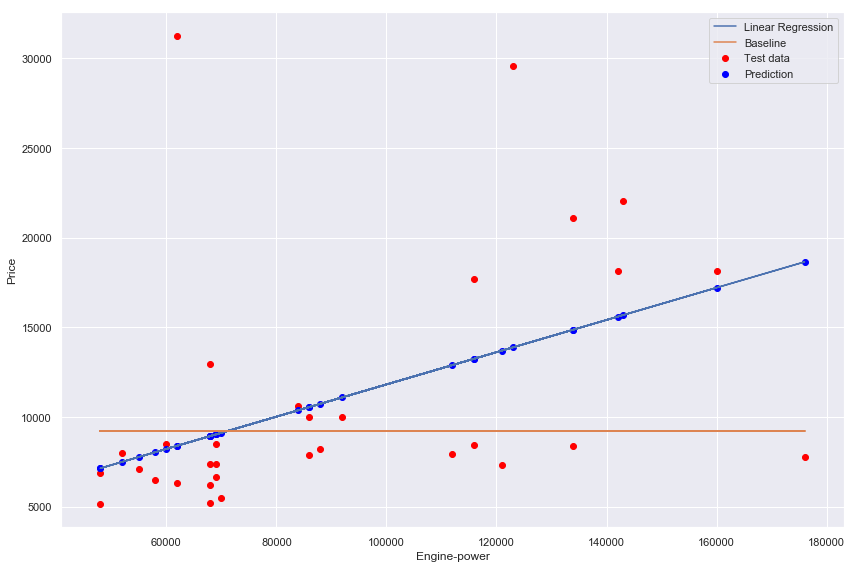

In [10]:
# (1) # Your Code goes here:
y_pred = regressor.predict(x_test)
y_baseline = [baseline]*x_test.shape[0]

# Scatterplot of the test-data price data-points:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(x_test, y_test, label='Test data', color='red')
# Scatterplot of the predict-data price data-points:
ax.scatter(x_test, y_pred, label='Prediction', color='blue')
# Fitted line
ax.plot(x_test, y_pred, label='Linear Regression')
# Baseline
ax.plot(x_test, y_baseline, label='Baseline') 
ax.set_xlabel('Engine-power')
ax.set_ylabel('Price')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

<div align="right"><font color="blue" size="4">7.0</font></div>

(2) ***Your answer goes here:***

The baseline model predicts well for those car price distributed around the median value. It predicts quite bad for the high priced car. For simple linear regression, as the engine power increases, the error in predicting in car price increase as we move along the line.

It is hard to compare both models using the plot above. It is better to compare by using the residuals under both models. 

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Your remarks here are sensible, but I would still like you to say whether overall, based on visual inspection alone, it looks like LR did better than baseline or not.</font></div>

### ========== Question 2.7 --- [20 marks] ==========
 
You might have noticed that the above plot is not easy to interpret. 
1. [Code] Generate another plot, this time showing a histogram of the residuals under both models (label everything). 
1. [Code] Report also the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE) on the same **hold-out** testing set for both predictors. *Hint: Scikit Learn has functions to help in evaluating both measures.*
1. [Text] Comment on the result. *Hint: In your answer, you should discuss what the graph is showing and what the two values are measuring, and finally compare the two models under all measures/plots.*

<div align="right"><font color="blue" size="4">16.0/20.0</font></div>

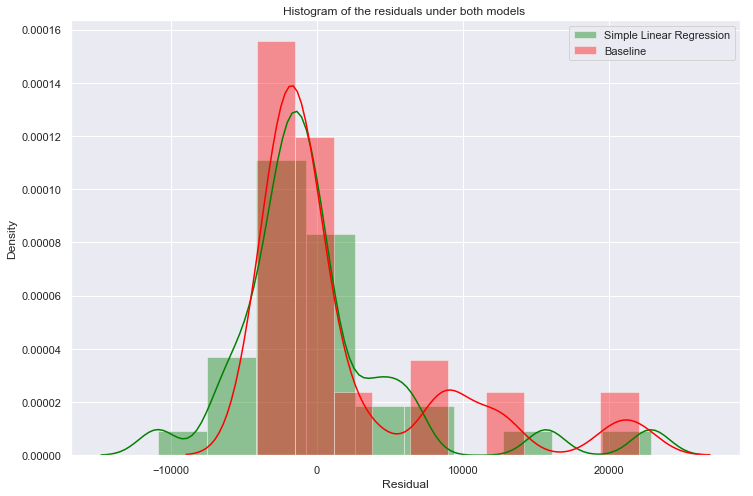

In [11]:
# (1) # Your Code goes here:
# Residual of both models: 
residual_simple = y_test - y_pred
residual_baseline = y_test - baseline

# Histogram of the residuals under both models :
fig, ax= plt.subplots(1,1,figsize=(12,8))
sns.distplot(residual_simple,label='Simple Linear Regression',color='green',bins=10)
sns.distplot(residual_baseline,label='Baseline',color='red',bins=10)
plt.xlabel('Residual')
plt.ylabel('Density')
plt.title('Histogram of the residuals under both models ')
plt.legend(loc='upper right')
plt.show()

<div align="right"><font color="blue" size="4">6.0</font></div>

In [12]:
# (2) # Your Code goes here:
# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE) on the same hold-out testing set for both predictors:
R2_slr = r2_score(y_test,y_pred)
R2_baseline = r2_score(y_test,y_baseline)
RMSE_slr = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE_baseline = np.sqrt(mean_squared_error(y_test, y_baseline))

print('For Simple Linear Rgression, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_slr,'%.3f'%RMSE_slr))
print()
print('For Baseline, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_baseline,'%.3f'%RMSE_baseline))


For Simple Linear Rgression, R2 = 0.169 and RMSE = 6153.704

For Baseline, R2 = -0.070 and RMSE = 6980.086


<div align="right"><font color="blue" size="4">4.0</font></div>

(3) ***Your answer goes here:***

The coefficient of determination (R2) corresponds to proportion of the total sum of squares explained by the model. The higher the better. R2 equals to 1 means the model does explain all the variabiliy in the data around the mean. The root mean squared error (RMSE) is used to measure the accuracy for continuous variables. 
 
R2 for the simple linear regression model we trained in [Question 2.5](#question_2_5) is higher, 0.169 compared to the Baseline model, which has negative value, -0.070.  MSE for the simple linear regression model we trained, 6153.704 is lower compared to the Baseline model, 6980.086. Since the higher the R2, the better the model fits the data, and the lower the RMSE, the better the model behaving, we would say that simple linear regression model is better than baseline model. However, even simple linear regression model is better than baseline, note that the value of its R2 is still pretty low.

The graph shos the distribution of residuals under both models. A key assumption of Linear Regression is linearity. We can check the assumption of linearlity by plotting distrubution of the residuals. If residuals are normally distributed, then it would mean that our assumption is true. When we plot a distribution of the residuals, residuals do not appear to be normally distributed. This means that we could improve our model and reduce our errors by using a non-linear model by maybe introducing polynomial regression. From the graph, we also see that the residuals under baseline model are generally higher than under simple linear regression.

<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Your explanation of RMSE is not very informative.
Explain why the baseline R^2 is not exactly zero, which literally corresponds to the prediction of the mean.
You should note that R^2 ranges from -1 to 1, where 1 is perfect prediction and 0 is a useless model, and that RMSE summarises the densities displayed in the plot.</font></div>

<a id='question_2_8'></a>
### ========== Question 2.8 --- [9 marks] ==========

So far we have used a hold-out test set for validation.

1. [Text] What are the repurcussions of this for interpreting the above results?

1. [Code] To solve this problem, we will use k-fold cross-validation to evaluate the performance of the regression model. By using Scikit-learn's [`KFold`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.KFold.html) class construct a 5-fold cross-validation object. Set `shuffle=True` and `random_state=0`. ***[Optional]*** *You may wish to visualise the training/validation indices per fold. The `split` method comes in handy in this case.*

  **N.B. You will use this KFold instance you are about to create throughout most of the remainder of this Assignment - keep track of it!**

1. [Code] Then train a new Linear Regression Model using the [`cross_val_predict`](http://scikit-learn.org/0.19/modules/generated/sklearn.model_selection.cross_val_predict.html) function. Report the Coefficient of Determination ($R^2$) and Root Mean Squared Error (RMSE).

1. [Text] Relate these to the previous results.



<div align="right"><font color="blue" size="4">8.0/9.0</font></div>

(1) ***Your answer goes here:***

Performance evaluation is subject to higher variance given the smaller size of the data. The evaluation may depend heavily on which data points end up in the training set and which end up in the test set, and thus the evaluation may be significantly different depending on how the division is made.

<div align="right"><font color="blue" size="4">2.0</font></div>

In [13]:
# (2) # Your Code goes here:
# 5-fold cross-validaton:
kf = KFold(n_splits=5, shuffle=True, random_state=0)
#for train_index, test_index in kf.split(x):
#    print("Train: {}".format(train_index))
#    print("Test:{}".format(test_index))
#    x_train, x_test = x[train_index], x[test_index]
#    y_train, y_test = y[train_index], y[test_index]

<div align="right"><font color="blue" size="4">2.0</font></div>

In [14]:
# (3) # Your Code goes here:
# Train a new Linear Regression Model using the cross_val_predict functin:
y_pred_cv = cross_val_predict(LinearRegression(),x,y,cv=kf)

# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE):
R2_slr_cv = r2_score(y,y_pred_cv)
RMSE_slr_cv = np.sqrt(mean_squared_error(y,y_pred_cv))
print(' R2 = {0} and RMSE = {1}'.format('%.3f'%R2_slr_cv,'%.3f'%RMSE_slr_cv))

 R2 = 0.173 and RMSE = 6114.452


<div align="right"><font color="blue" size="4">4.0</font></div>

(4) ***Your answer goes here:*** 
Compare to simple linear regression model we trained previouly in Question 2.5, the coefficient of determination (R2) increases slightly from 0.169 to 0.173, whereas the root mean squared error (RMSE) decreases slightly from 6153.704 to 6110.452. Since the higher the R2, the better the model fits the data, and the lower the RMSE, the better the model behaving, we would say that by using 5-fold cross-validation to evaluate the performance of the regression model do improve the model.

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">This misses the point. Remember, all this is doing is the same thing you did previously, but aggregating over 5 different train-test splits. The question to be asking here is not 'which model is more accurate?' (It's five more or less similar models), but 'do I increase the validity of my testing procedure by doing k-fold here, or was a single train-test split sufficient?' (the latter, really)</font></div>

### ========== Question 2.9 --- (LEVEL 11) --- [18 marks] ==========

1. [Code] Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the $R^2$ and RMSE metrics for this model (on testing set). 

1. [Code/Text] You should notice a significant change in performance. Where is this coming from? Use visualisation/analysis methods you have learnt to answer this question. Document your code and describe your analysis (via inline comments) as you progress. Your written answer should be just a short paragraph (1-3 sentences) describing your conclusion.

*Hint: you may find it easier to understand what is happening if you use a hold-out test-set rather than cross-validation in this case. Also, make use of pandas methods to help you.*

<div align="right"><font color="blue" size="4">12.0/18.0</font></div>

In [15]:
# (1) # Your Code goes here:
# Load the new data set: 
data_path = os.path.join(os.getcwd(),'datasets','train_auto_base.csv')
auto_base = pd.read_csv(data_path,delimiter=',')

# Build a Simple Linear Regression model on this dataset
x2 = auto_base['engine-power'][:,np.newaxis]
y2 = auto_base['price'][:,np.newaxis]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, test_size=0.2, random_state=0)
regressor2 = LinearRegression()
regressor2.fit(x2_train, y2_train)
y2_pred = regressor2.predict(x2_test)

# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE) on testing set:
R2_slr2 = r2_score(y2_test,y2_pred)
RMSE_slr2 = np.sqrt(mean_squared_error(y2_test,y2_pred))
print('For simple linear regression in Q2.9,  R2 = {0} and RMSE = {1}'.format('%.3f'%R2_slr2,'%.3f'%RMSE_slr2))


For simple linear regression in Q2.9,  R2 = -0.015 and RMSE = 6800.331


<div align="right"><font color="blue" size="4">6.0</font></div>

,Model in Q2.5,Model in Q2.9
Intercept,2823.122,11853.268
Weight,0.090,0.000
R2,0.169,-0.015
RMSE,6153.704,6800.331


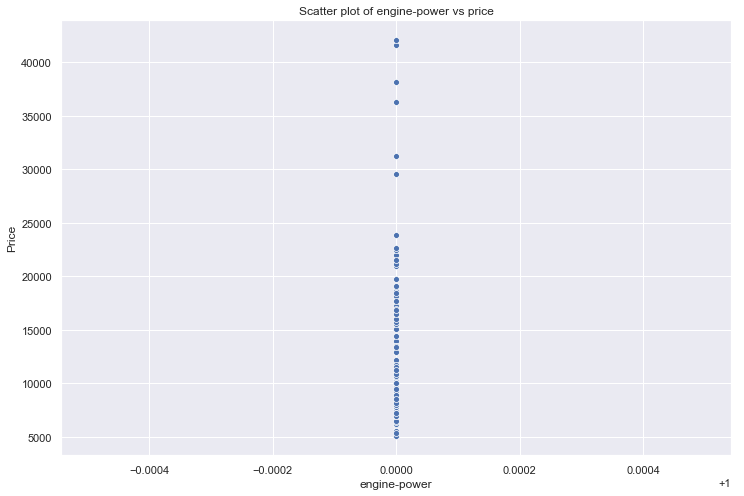

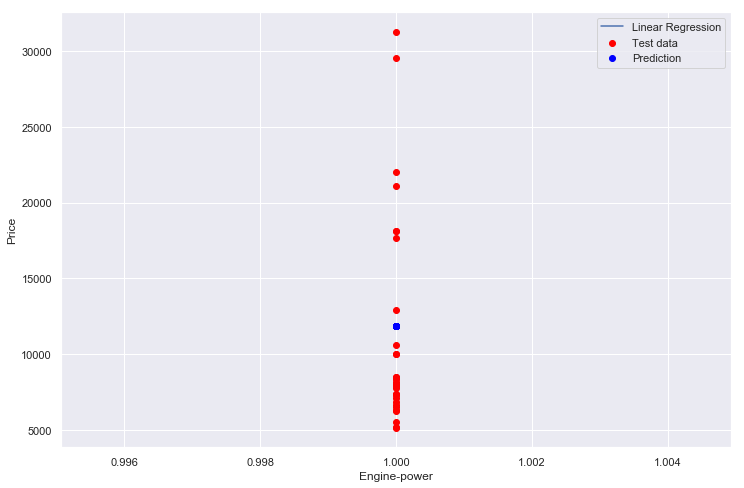

In [16]:
# (2) Show any working code here...
# Your Code goes here:
# Estimated coefficients of the new model
weight2 = regressor2.coef_[0][0]
intercp2 = regressor2.intercept_[0]

# Estimated coefficients, R2 and RMSE from Model in Q2.5
weight = regressor.coef_[0][0]
intercp = regressor.intercept_[0]
y_pred = regressor.predict(x_test)
R2_slr = r2_score(y_test,y_pred)
RMSE_slr = np.sqrt(mean_squared_error(y_test,y_pred))

# Create a dataframe to contain all the information from model in Q2.4 and Q2.9:
comparison_df = pd.DataFrame([[intercp,intercp2],[weight,weight2],[R2_slr,R2_slr2],[RMSE_slr,RMSE_slr2]],
                             index=['Intercept', 'Weight', 'R2', 'RMSE'],
                             columns=['Model in Q2.5', 'Model in Q2.9'])
display(comparison_df.round(3))

# Scatter plot of engine-power vs price to check the distribution of engime-power
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax = sns.scatterplot(auto_base['engine-power'], auto_base['price'])
ax.set_ylabel('Price')
ax.set_title('Scatter plot of engine-power vs price')

# Scatterplot of the test-data price data-points:
fig, ax = plt.subplots(1,1,figsize=(12,8))
ax.scatter(x2_test, y2_test, label='Test data', color='red')
# Scatterplot of the predict-data price data-points:
ax.scatter(x2_test, y2_pred, label='Prediction', color='blue')
# Fitted line
ax.plot(x2_test, y2_pred, label='Linear Regression')
ax.set_xlabel('Engine-power')
ax.set_ylabel('Price')
ax.legend(loc='upper right')
plt.show()


<div align="right"><font color="blue" size="4">6.0</font></div>

<div align="left"><font color="green" size="4">Good investigation, but you miss the crucial point...</font></div>

(2) - Final Conclusion(s)
***Your answer goes here:***

From the scatter plot of `price` against `engine-power`, it shows unusual relationship, that is nonlinearity relationship. We only has one value of `engine-power` for all the different `price`. The linear regression model  is not suitable for this dataset. 

<div align="right"><font color="blue" size="4">0.0</font></div>

<div align="left"><font color="green" size="4">You miss the most important thing - that all engine-power values have been changed to 1.0! Note that this means the predictor has zero explanatory power , and that this is equivalent to the naïve mean predictor baseline.</font></div>

## 3. Multivariate Linear Regression
In this Section we will fit a Multivariate Linear Regression model (still using [`LinearRegression`](http://scikit-learn.org/0.19/modules/generated/sklearn.linear_model.LinearRegression.html)) to the dataset: i.e. we will now train a model with **multiple** explanatory variables and ascertain how they affect our ability to predict the retail price of a car. 

**N.B. We will use the *KFold* instance you created in [Question 2.8](#question_2_8) to train & validate our models.**

### ========== Question 3.1 --- [6 marks] ==========

1. [Code] Train a Multi-Variate `LinearRegression` model on the original `auto_numeric` dataframe you loaded in [Question 1.1](#question_1_1), and evaluate it using the *KFold* instance you created in [Question 2.8](#question_2_8) (report RMSE and $R^2$). 
1. [Text] Comment on the result, and compare with the univariate linear regression model we trained previously ([Question 2.5](#question_2_5)).

<div align="right"><font color="blue" size="4">6.0/6.0</font></div>

In [17]:
# (1) # Your Code goes here:
# Train a Multi-Variate Linear Regression model
X = auto_numeric.iloc[:,:-1]
Y = auto_numeric.iloc[:,-1]
Y_pred_cv = cross_val_predict(LinearRegression(),X,Y,cv=kf)

# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE):
R2_mlr_cv = r2_score(Y,Y_pred_cv)
RMSE_mlr_cv = np.sqrt(mean_squared_error(Y,Y_pred_cv))

print('For Univariate Linear Regression model in Q2.5, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_slr,'%.3f'%RMSE_slr))
print()
print('For Multivariate Linear Regression model, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_mlr_cv,'%.3f'%RMSE_mlr_cv))

For Univariate Linear Regression model in Q2.5, R2 = 0.169 and RMSE = 6153.704

For Multivariate Linear Regression model, R2 = 0.486 and RMSE = 4819.805


<div align="right"><font color="blue" size="4">4.0</font></div>

(2) ***Your answer goes here:***

Compare to univariate linear regression model we trained previouly in [Question 2.5](#question_2_5), the coefficient of determination (R2) increases greatly from  0.173 to 0.486, whereas the root mean squared error (RMSE) decreases greatly from 6110.452 to 4819.805. Since the higher the R2, the better the model fits the data, and the lower the RMSE, the better the model behaving, we would say that multivariate linear regression model is better than univariate linear regression model. It is better to use more attributes to define target outcome. 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 3.2 --- [4 marks] ==========

1. [Code] Examine the scatter plot of `engine-size` vs `price` again (plot again below)
1. [Text] Why might this cause a problem for linear regression? 

<div align="right"><font color="blue" size="4">3.0/4.0</font></div>

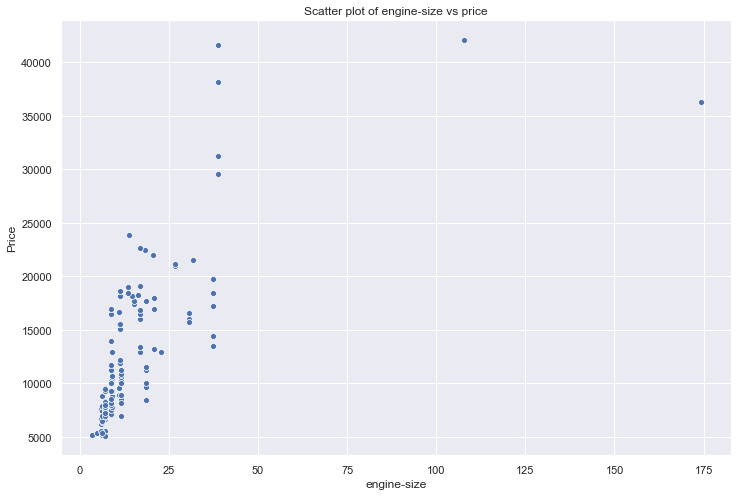

In [18]:
# (1) # Your Code goes here:
# Plot scatterplot with labels
fig, ax= plt.subplots(1,1,figsize=(12,8))
ax = sns.scatterplot(auto_numeric['engine-size'], auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Scatter plot of engine-size vs price')
plt.show()

<div align="right"><font color="blue" size="4">2.0</font></div>

(2) ***Your answer goes here:***

From the graph shown, it seems like there are few extreme `engine-size` value compared to other data points as well as few extreme `price` value compared to other data points. We might considered those points as outliers. This will cause a problem to linear regression because linear regression is sensitive to outliers. There are some systemic extreme values, causing skewed distribution, this will affect the linear regression model. Besides, there is no obvious linear relationship from the graph shown. 

<div align="right"><font color="blue" size="4">1.0</font></div>

<div align="left"><font color="green" size="4">Overall, engine size is skewed with respect to price, and the extreme values we see certainly contribute to that; but we have no reason to suppose they are outliers.</font></div>

<a id='question_3_3'></a>
### ========== Question 3.3 --- [10 marks] ==========
In class we discussed ways of preprocessing features to improve performance in such cases.
1. [Code] Transform the `engine-size` attribute using an appropriate technique from the lectures (document it in your code) and show the transformed data (scatter plot).
1. [Code] Then retrain a LinearRegression Model and report $R^2$ and RMSE. 
1. [Text] How has the performance of the model changed when compared to the previous result? and why so significantly?

<div align="right"><font color="blue" size="4">8.0/10.0</font></div>

Text(0.5,1,'Engine-size')

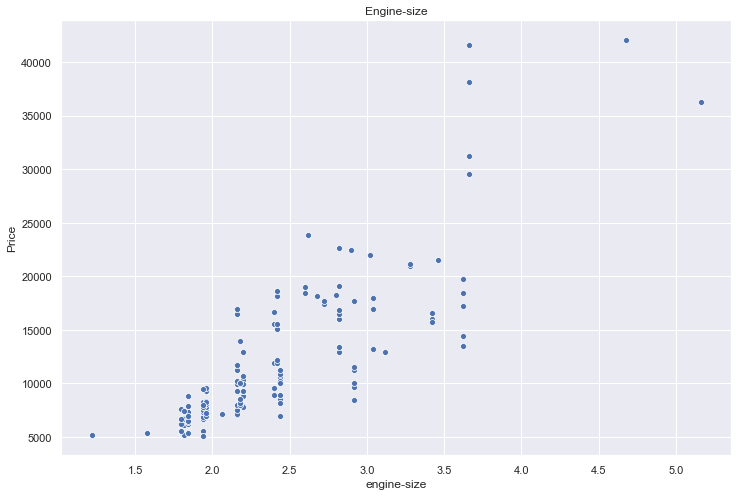

In [19]:
# (1) # Your Code goes here:
# Transform the engine-size attribute:
transformed_engine_size = np.log(auto_numeric['engine-size'])

# Plot scatterplot with labels
fig, ax= plt.subplots(1,1,figsize=(12,8))
ax = sns.scatterplot(transformed_engine_size, auto_numeric['price'])
ax.set_ylabel('Price')
ax.set_title('Engine-size')

<div align="right"><font color="blue" size="4">2.0</font></div>

In [20]:
# (2) # Your Code goes here:
# Train a new Multi-Variate Linear Regression model with transfromed engine-size attribute: 
X2 = auto_numeric.iloc[:,:-1].copy()
X2['engine-size'] = transformed_engine_size
Y = auto_numeric.iloc[:,-1]
Y_pred_cv = cross_val_predict(LinearRegression(),X2,Y,cv=kf)

# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE):
R2_mlr2_cv = r2_score(Y,Y_pred_cv)
RMSE_mlr2_cv = np.sqrt(mean_squared_error(Y,Y_pred_cv))
print('For Multivariate Linear Regression model in Q3.1, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_mlr_cv,'%.3f'%RMSE_mlr_cv))
print()
print('For Multivariate Linear Regression model in Q3.3, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_mlr2_cv,'%.3f'%RMSE_mlr2_cv))


For Multivariate Linear Regression model in Q3.1, R2 = 0.486 and RMSE = 4819.805

For Multivariate Linear Regression model in Q3.3, R2 = 0.690 and RMSE = 3745.920


<div align="right"><font color="blue" size="4">3.0</font></div>

***Your answer goes here:***

Compare to multivariate linear regression model we trained previouly in [Question 3.1](#question_3_1), the coefficient of determination (R2) increases greatly from  0.486 to 0.690, whereas the root mean squared error (RMSE) decreases greatly from 4819.805 to 3745.920. Since the higher the R2, the better the model fits the data, and the lower the RMSE, the better the model behaving, we would say that multivariate linear regression model in [Question 3.3](#question_3_3) is better than multivariate linear regression model in [Question 3.1](#question_3_1). The result is so significant because we have done the log transformation on`engine-size`. After the log transformation, the relationship between `engine-size` and `price` improves and shows linearity relationship on the graph. The extreme values not considered to be outliers anymore after transformation. 

<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">Note that:
* The relationship between price and log(e.s.) is much more linear.</font></div>

### ========== Question 3.4 --- (LEVEL 11) --- [12 marks] ==========

The simplicity of Linear Regression allows us to interpret the importance of certain features in predicting target variables. However this is not as straightforward as just reading off the coefficients of each of the attributes and ranking them in order of magnitude.

1. [Text] Why is this? How can we *linearly* preprocess the attributes to allow for a comparison? Justify your answer.
1. [Code] Perform the preprocessing you just mentioned on the transformed data-set from [Question 3.3](#question_3_3), retrain the Linear-Regressor and report the coefficients in a readable manner. *Tip: To simplify matters, you may abuse standard practice and train the model once on the entire data-set with no validation/test set.*
1. [Text] Which are the three (3) most important features for predicting price under this model?

<div align="right"><font color="blue" size="4">11.0/12.0</font></div>

(1) ***Your answer goes here:***

The regression coefficient of each of the attributes represents the average effect on target variable of a one unit increase in each attribute respectively, holiding all oter attributes fixed. It is easy to think we can rank them in order of magnitue as larger coefficients impying larger change in the target variable. However, it is not that straigtforward as we thought as the units vary between the different types of attributes, they have different means and variances so we cannot rank them directly. Attribute that has larger coefficients don’t necessarily imply that attribute is more important.

To linearly preprocess the attributes to allow for a comparision, we could standardise the regression coefficients so they are not based on the different scale. After standardising, the mean of each attributes is equal to zero and standard deviation is equal to one. Thus, we can compare them direcly by ranking them in order of magnitude. Now, the standardized regression coefficient of each of the attributes represents the average effect on target variable of a one unit standard deviation change in the each attribute.


<div align="right"><font color="blue" size="4">3.0</font></div>

<div align="left"><font color="green" size="4">What you describe sounds more like normalisation than standardisation. Both are valid, but be exact in your use of terminology. It matters.</font></div>

In [21]:
# (2) # Your Code goes here:
# Normalise inputs:
X2 = auto_numeric.iloc[:,:-1].copy()
X2['engine-size'] = transformed_engine_size
Y = auto_numeric.iloc[:,-1]

X2_scaled = preprocessing.scale(X2)

# Build a new linear regression model
regressor_scaled = LinearRegression()
regressor_scaled.fit(X2_scaled,Y)

# Creat a datafram to hold the coefficients from our model
scaledmodel_df = pd.DataFrame(regressor_scaled.coef_ ,index=X2.columns,columns=['Estimated Coefficients'])
display(scaledmodel_df.sort_values('Estimated Coefficients'))


,Estimated Coefficients
highway-mpg,-1399.619093
stroke,-767.587216
engine-power,-542.794225
mean-effective-pressure,-535.958233
bore,-434.147218
normalized-losses,-297.556203
torque,-104.195716
length,-39.380371
wheel-base,403.374052
height,409.266758


<div align="right"><font color="blue" size="4">6.0</font></div>

(3) ***Your answer goes here:***

I choose those features because they have the highest absolute values of estimated coefficients among others. The three most important features for predicting price under this model: 

  * `engine-size`
  * `highway-mpg`
  * `width`
 

<div align="right"><font color="blue" size="4">2.0</font></div>

### ========== Question 3.5 --- (LEVEL 11) --- [10 marks] ==========

In the lectures we discussed another form of extension to the basic linear-regression model: the introduction of basis functions. This method attempts to capture non-linearities in the input-output mapping.

1. [Text] How would you choose the features to test higher-orders on? And how would you choose the best polynomial order for these features?
1. [Code] Load the csv file `train_auto_nonlinear.csv` into a new dataframe (this is a standard version of the transformed data-set from [Question 3.3](#question_3_3)). Add a second-order basis to the two attributes `length` and `engine-power` and train a new LinearRegression model. Report the $R^2$ and RMSE performance.
1. [Text] Comment on the result in relation to those in [Question 3.3](#question_3_3).

<div align="right"><font color="blue" size="4">7.5/10.0</font></div>

(1) ***Your answer goes here:***

Here we have 15 features. We can visualize our features so that we have an idea of which one we would like to test higher-order on. We can do a scatter plot to observe the basis of what a linear relationship between each of our features and target looks like. We can choose the attributes that appear to have nonlinear relationship with the target. And then we can rebuild a new linear regression model and check whether there is further reducing of RMSE and further improving the R2. 

The choice of polynomial order will affect the model's bias-variance tradeoff. We want a model that simultaneously achieves low variance and low bias. As we transform our equation, we make it more flexible. This allows us to better fit our data when it is non-linear. However, in general, more flexible models have higher variance, causing overfitting problem, i.e, changing any one of the data points may cause the prediction to change simultaneously. We can set the threshold, then iterate by buidling the new model with increasing the order of polynomial by one each time, check the percentage change of RMSE and R2. If the percentage change is not significant, we can stop the iteration. 


<div align="right"><font color="blue" size="4">2.0</font></div>

In [22]:
# (2) # Your Code goes here:
# Load the new data set: 
data_path = os.path.join(os.getcwd(),'datasets','train_auto_nonlinear.csv')
auto_nonlinear = pd.read_csv(data_path,delimiter=',')

# Add two new variables: 
auto_nonlinear['length-squared'] = auto_nonlinear['length']**2
auto_nonlinear['engine-power-squared'] = auto_nonlinear['engine-power']**2

#Train a new Linear regression model:
X3 = auto_nonlinear.drop('price',axis=1)
Y3 = auto_nonlinear['price']
Y3_pred_cv = cross_val_predict(LinearRegression(),X3,Y3,cv=kf)


# Coefficient of Determination ( R2 ) and Root Mean Squared Error (RMSE):
R2_mlr3_cv = r2_score(Y3,Y3_pred_cv)
RMSE_mlr3_cv = np.sqrt(mean_squared_error(Y3,Y3_pred_cv))
print('For Multivariate Linear Regression model in Q3.3, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_mlr2_cv,'%.3f'%RMSE_mlr2_cv))
print()
print('For Multivariate Linear Regression model in Q3.5, R2 = {0} and RMSE = {1}'.format('%.3f'%R2_mlr3_cv,'%.3f'%RMSE_mlr3_cv))


For Multivariate Linear Regression model in Q3.3, R2 = 0.690 and RMSE = 3745.920

For Multivariate Linear Regression model in Q3.5, R2 = 0.681 and RMSE = 3795.033


<div align="right"><font color="blue" size="4">5.0</font></div>

<div align="left"><font color="green" size="4">Data missing:
The cross-product of the original features</font></div>

(3) ***Your answer goes here:***

Compare to multivariate linear regression model we trained previouly in [Question 3.3](#question_3_3), the coefficient of determination (R2) decreases slighly from  0.690 to 0.681, whereas the root mean squared error (RMSE) increases slightly from 3745.920 to 3795.033. The higher the R2, the better the model fits the data, and the lower the RMSE, the better the model behaving. It seems like the added complexity does not lead to improve of model. We would say that multivariate linear regression model in [Question 3.3](#question_3_3) is better than multivariate linear regression model in [Question 3.5](#question_3_5). Linearity model is better than non-linearity model in this case.

<div align="right"><font color="blue" size="4">0.5</font></div>

<div align="left"><font color="green" size="4">I wouldn't set too much store in small differences in performance.
Also, overfitting may have played a part.</font></div>